In [6]:
import sys
!conda install --yes --prefix {sys.prefix} matplotlib

Solving environment: ...working... done

# All requested packages already installed.



In [44]:
# Graph to compare min and max finish time amongst all of the metrics
% matplotlib inline
import matplotlib.pyplot as plt
import math
import json
import os
import datetime

# Extracts statistics from the data object which is an array of job dictionaries
# processes stat if necessary
def extract_stat(data_obj, stat_x, stat_y):
    stats_x = []
    stats_y = []
    for job in data_obj:
        stat_value_x = None
        stat_value_y = None
        # Account for stats in which two values need to be subtracted
        if isinstance(stat_x, tuple):
            stat_value_x = abs(job[stat_x[0]] - job[stat_x[1]])
        if isinstance(stat_y, tuple):
            stat_value_y = abs(job[stat_y[0]] - job[stat_y[1]])
        if not stat_value_x:
            stat_value_x = job[stat_x]
        if not stat_value_y:
            stat_value_y = job[stat_y]
            
        stats_x.append(stat_value_x)
        stats_y.append(stat_value_y)
    return (max(stats_x), max(stats_y))

# generates a graph that compares the given metrics with the 2 statistics
# 
# metrics - The list of metrics
# stat_x - The name of the stat as shown in the json. If the stat contains a tuple of 2, the difference
# of the first and second in the tuple will be used.
# stat_y - The name of the other stat as shown in the json
def generate_comparison(metrics, stat_x, stat_y):

    n_groups=16
    fig, ax = plt.subplots(figsize=(15,10))

    index = np.arange(n_groups)
    bar_width = 0.2

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    metric_stats = {}
    for metric in metrics:
        metric_stats[metric] = {stat_x: None, stat_y:None}
        data_files = get_associated_files(metric)
        stat_values_x = []
        stat_values_y = []
        for data_file in data_files:
            # Compile the data file path
            data_file_path = os.path.join(cwd, stats_dir)
            fp = open(pathed)
            data_obj = json.load(fp)
            stat_value_x, stat_value_y = extract_stat(data_obj, stat_x, stat_y)
            stat_values_x.append(stat_value_x)
            stat_values_y.append(stat_value_y)
        metric_stats[metric][stat_x] = max(stat_values_x)
        metric_stats[metric][stat_y] = max(stat_values_y)
        
    for: # TODO, add a line for each metric instead of bar
        rects1 = ax.bar(x, [math.log(i,10) for i in y1], bar_width,
                        alpha=opacity,
                        error_kw=error_config,
                        label='Dataframe')

    ax.set_xlabel('Job Number (Determines Memory Setting)')
    ax.set_ylabel('Peak Memory (Log Base 10)')
    ax.set_title('Peak Execution Memory for Each Memory Setting')
    ax.set_xticks(1 + index + bar_width)
    ax.set_xticklabels(x)
    ax.legend()

    fig.tight_layout()
    plt.show()

SyntaxError: invalid syntax (<ipython-input-44-5e6f5cc930c0>, line 65)

In [45]:
# Script to get JSON data from 
import re
import matplotlib.pyplot as plt
import json
import os
import datetime
import numpy as np
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', 500)

cwd = os.getcwd()
if cwd.startswith("C"):
    cwd = "C:\\Users\\maria\\Documents\\Grad School\\Fall2018\\CMSC611\\Projects\\all-20181213T021317Z-001\\all\\"
stats_dir = "spark-stats"
metrics_dir = "metrics"
base_dir = os.path.dirname(cwd)

spark_stats_dir=""
spark_metrics_dir=""
if(cwd.startswith("C")): #On a Windows
    spark_stats_dir = base_dir + "\\" + stats_dir
    spark_metrics_dir = base_dir + "\\" + metrics_dir
else:
    spark_stats_dir = base_dir + "/" + stats_dir
    spark_metrics_dir = base_dir + "/" + metrics_dir

metric_output_mapping = {
    "basic-dataframe-run-output": "BasicDataframe",
    "basic-dataset-run-output": "BasicDataset",
    "basic-rdd-run-output": "BasicRDD",
    "cache-dataframe-run-output": "CacheDataframe",
    "cache-dataset-run-output": "CacheDataset",
    "cache-rdd-run-output": "CacheRDD",
    "kmeans-dataframe-run-output": "KMeansDataframe",
    "kmeans-dataset-run-output": "KMeansDataset",
    "map-partitions-rdd-run-output": "MapPartitionsRDD",
    "map-rdd-run-output": "MapRDD",
    "partition-dataframe-run-output": "PartitionDataframe",
    "parititon-dataset-run-output": "PartitionDataset",
    "partition-rdd-run-output": "PartitionRDD"
}

metric_output_mapping_inv = {v: k for k, v in metric_output_mapping.items()}

#Given stats app name, get the file name
def get_spark_stats_file(appName):
    if(cwd.startswith("C")):
        return spark_stats_dir + "\\" + appName
    else:
        return spark_stats_dir + "/" + appName

#Given the metrics output name, get the file name
def get_metrics_file(fileName):
    if(cwd.startswith("C")):
        return spark_metrics_dir + "\\" + fileName
    else:
        return spark_metrics_dir + "/" + fileName

def get_associated_appnames(run_output_name):
    valid_files = list(pd.read_csv(get_metrics_file(run_output_name))["appName"])
    return [a_file for a_file in os.listdir(spark_stats_dir) if a_file in valid_files]

def get_run_params(appName):
    for beginningOutput in metric_output_mapping_inv:
        if appName.startswith(beginningOutput):
            metrics_df = pd.read_csv(get_metrics_file(metric_output_mapping_inv[beginningOutput]))
            return metrics_df[metrics_df["appName"] == appName]

def metrics_df_sort(metrics_df):
    return metrics_df.sort_values(by=['threadCount', 'executorMem', 'overheadMem'])

def get_metrics(run_output_name):
    raw_metrics = pd.read_csv(get_metrics_file(run_output_name))
    raw_metrics["executorMem"] = raw_metrics["executorMem"].apply(lambda x: int(x[:-1]))
    raw_metrics["overheadMem"] = raw_metrics["overheadMem"].apply(lambda x: int(x[:-1]))
    return raw_metrics

def get_spark_stats(appName):
    return pd.read_json(get_spark_stats_file(appName))

print(cwd)
print(base_dir)
print(get_associated_appnames("basic-dataframe-run-output"))

/Users/bnicholls/Documents/School/cmsc611-project/python_scripts
/Users/bnicholls/Documents/School/cmsc611-project
['BasicDataframeRunner-2018-12-09T07:27:23.1544340443Z', 'BasicDataframeRunner-2018-12-09T07:30:52.1544340652Z', 'BasicDataframeRunner-2018-12-09T07:12:34.1544339554Z', 'BasicDataframeRunner-2018-12-09T07:32:57.1544340777Z', 'BasicDataframeRunner-2018-12-09T07:20:38.1544340038Z', 'BasicDataframeRunner-2018-12-09T07:35:01.1544340901Z', 'BasicDataframeRunner-2018-12-09T07:17:42.1544339862Z', 'BasicDataframeRunner-2018-12-09T07:15:07.1544339707Z', 'BasicDataframeRunner-2018-12-09T07:09:59.1544339399Z', 'BasicDataframeRunner-2018-12-09T07:33:59.1544340839Z', 'BasicDataframeRunner-2018-12-09T07:25:05.1544340305Z', 'BasicDataframeRunner-2018-12-09T07:07:23.1544339243Z', 'BasicDataframeRunner-2018-12-09T07:23:36.1544340216Z', 'BasicDataframeRunner-2018-12-09T07:28:33.1544340513Z', 'BasicDataframeRunner-2018-12-09T07:22:07.1544340127Z', 'BasicDataframeRunner-2018-12-09T07:29:42.15

In [2]:
map_partitions_files = get_associated_appnames("map-partitions-rdd-run-output")
map_files = get_associated_appnames("map-rdd-run-output")
sample = pd.read_json(get_spark_stats_file(map_partitions_files[0]))
list(sample)

['bytesRead',
 'bytesWritten',
 'diskBytesSpilled',
 'duration',
 'executorCpuTime',
 'executorDeserializeCpuTime',
 'executorDeserializeTime',
 'executorId',
 'executorRunTime',
 'finishTime',
 'gettingResultTime',
 'host',
 'index',
 'jobGroup',
 'jobId',
 'jvmGCTime',
 'launchTime',
 'memoryBytesSpilled',
 'numUpdatedBlockStatuses',
 'peakExecutionMemory',
 'recordsRead',
 'recordsWritten',
 'resultSerializationTime',
 'resultSize',
 'schedulerDelay',
 'shuffleBytesWritten',
 'shuffleFetchWaitTime',
 'shuffleLocalBlocksFetched',
 'shuffleRecordsWritten',
 'shuffleRemoteBlocksFetched',
 'shuffleTotalBlocksFetched',
 'shuffleTotalBytesRead',
 'shuffleWriteTime',
 'speculative',
 'stageId',
 'successful',
 'taskLocality']

In [3]:
sample["stageId"].value_counts()

1    12834
0    12834
Name: stageId, dtype: int64

In [61]:
def get_full_execution_time(df):
    start_time = min(df["launchTime"])
    end_time = max(df["finishTime"])
    time_range = end_time - start_time
    return (start_time, end_time, time_range)

def get_full_cpu_time(df):
    return df["executorCpuTime"].sum()

def get_max_peakExecutionMemory(df):
    return max(df["peakExecutionMemory"])

def get_min_peakExecutionMemory(df):
    return min(df["peakExecutionMemory"])

In [5]:
t = get_full_execution_time(sample)

In [6]:
t

(1544334253692, 1544334316578, 62886)

In [7]:
get_run_params(map_partitions_files[0])

,appName,threadCount,executorMem,overheadMem
13,MapPartitionsRDDRunner-2018-12-09T05:42:18.154...,4,1024m,384m


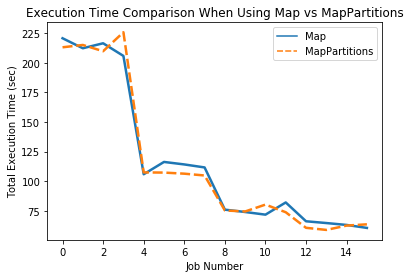

In [54]:
# Map Partitions RDD vs Map RDD
# Line plot of the job num vs execution time
mapPartitions_vs_map_df = {
    "BasicRDD": get_metrics("basic-rdd-run-output")["appName"].apply(lambda appName:get_full_execution_time(get_spark_stats(appName))[2]/1000.0),
    "MapPartitions": get_metrics("map-partitions-rdd-run-output")["appName"].apply(lambda appName:get_full_execution_time(get_spark_stats(appName))[2]/1000.0),
    "Map": get_metrics("map-rdd-run-output")["appName"].apply(lambda appName:get_full_execution_time(get_spark_stats(appName))[2]/1000.0),  
}
data = pd.DataFrame(mapPartitions_vs_map_df)

ax = sns.lineplot(data=data, linewidth=2.5)
ax.set(xlabel='Job Number', ylabel='Total Execution Time (sec)', title="Execution Time Comparison When\nUsing Map vs MapPartitions vs BasicRDD")
plt.savefig("images/mapVsMapPartitionsAllExecutionTime.png")

plt.cla()

#Now do cleanup
data["MapPartitions"] = data[["MapPartitions", "BasicRDD"]].min(axis=1)
data = data.drop(["BasicRDD"], axis=1)

ax = sns.lineplot(data=data, linewidth=2.5)
ax.set(xlabel='Job Number', ylabel='Total Execution Time (sec)', title="Execution Time Comparison When Using Map vs MapPartitions")
plt.savefig("images/mapVsMapPartitionsBestExecutionTime.png")

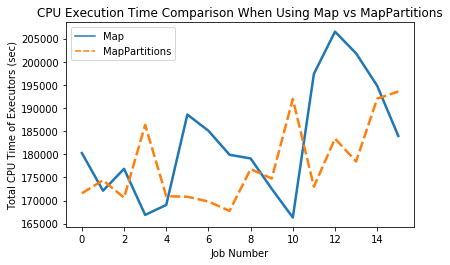

In [56]:

mapPartitions_vs_map_df = {
    "BasicRDD": get_metrics("basic-rdd-run-output")["appName"].apply(lambda appName:get_full_cpu_time(get_spark_stats(appName))),
    "MapPartitions": get_metrics("map-partitions-rdd-run-output")["appName"].apply(lambda appName:get_full_cpu_time(get_spark_stats(appName))),
    "Map": get_metrics("map-rdd-run-output")["appName"].apply(lambda appName:get_full_cpu_time(get_spark_stats(appName))),  
}
data = pd.DataFrame(mapPartitions_vs_map_df)

ax = sns.lineplot(data=data, linewidth=2.5)
ax.set(xlabel='Job Number', ylabel='Total CPU Time of Executors (sec)', title="CPU Execution Time Comparison When\nUsing Map vs MapPartitions vs BasicRDD")
plt.tight_layout() # Make figure big enough that labels fit
plt.savefig("images/mapVsMapPartitionsAllCpuTime.png")

plt.cla()

data["MapPartitions"] = data[["MapPartitions", "BasicRDD"]].min(axis=1)
data = data.drop(["BasicRDD"], axis=1)

ax = sns.lineplot(data=data, linewidth=2.5)
ax.set(xlabel='Job Number', ylabel='Total CPU Time of Executors (sec)', title="CPU Execution Time Comparison When Using Map vs MapPartitions")
plt.savefig("images/mapVsMapPartitionsBestCpuTime.png")

plt.cla()

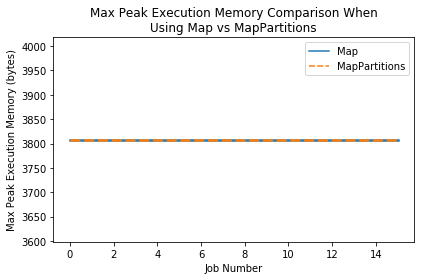

In [62]:
mapPartitions_vs_map_df = {
    "MapPartitions": get_metrics("map-partitions-rdd-run-output")["appName"].apply(lambda appName:get_max_peakExecutionMemory(get_spark_stats(appName))),
    "Map": get_metrics("map-rdd-run-output")["appName"].apply(lambda appName:get_max_peakExecutionMemory(get_spark_stats(appName))),  
}
data = pd.DataFrame(mapPartitions_vs_map_df)

ax = sns.lineplot(data=data, linewidth=2.5)
ax.set(xlabel='Job Number', ylabel='Max Peak Execution Memory (bytes)', title="Max Peak Execution Memory Comparison When\nUsing Map vs MapPartitions")
plt.tight_layout() # Make figure big enough that labels fit
plt.savefig("images/mapVsMapPartitionsMaxPeakExecutionMemory.png")


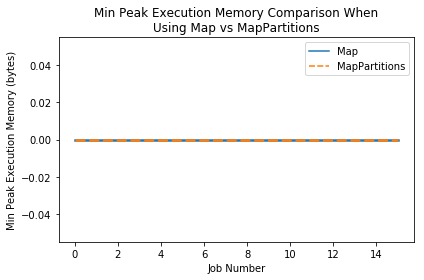

In [63]:
mapPartitions_vs_map_df = {
    "MapPartitions": get_metrics("map-partitions-rdd-run-output")["appName"].apply(lambda appName:get_min_peakExecutionMemory(get_spark_stats(appName))),
    "Map": get_metrics("map-rdd-run-output")["appName"].apply(lambda appName:get_min_peakExecutionMemory(get_spark_stats(appName))),  
}
data = pd.DataFrame(mapPartitions_vs_map_df)

ax = sns.lineplot(data=data, linewidth=2.5)
ax.set(xlabel='Job Number', ylabel='Min Peak Execution Memory (bytes)', title="Min Peak Execution Memory Comparison When\nUsing Map vs MapPartitions")
plt.tight_layout() # Make figure big enough that labels fit
plt.savefig("images/mapVsMapPartitionsMinPeakExecutionMemory.png")


In [65]:
maxPeakExecutionMemory = 0
for appName in get_metrics("map-partitions-rdd-run-output")["appName"]:
    maxPeakExecutionMemory = max(maxPeakExecutionMemory, get_max_peakExecutionMemory(get_spark_stats(appName)))
sample_df = get_spark_stats(get_metrics("map-partitions-rdd-run-output")["appName"][0])

In [66]:
sample_df[sample_df["peakExecutionMemory"] == maxPeakExecutionMemory]

,bytesRead,bytesWritten,diskBytesSpilled,duration,executorCpuTime,executorDeserializeCpuTime,executorDeserializeTime,executorId,executorRunTime,finishTime,gettingResultTime,host,index,jobGroup,jobId,jvmGCTime,launchTime,memoryBytesSpilled,numUpdatedBlockStatuses,peakExecutionMemory,recordsRead,recordsWritten,resultSerializationTime,resultSize,schedulerDelay,shuffleBytesWritten,shuffleFetchWaitTime,shuffleLocalBlocksFetched,shuffleRecordsWritten,shuffleRemoteBlocksFetched,shuffleTotalBlocksFetched,shuffleTotalBytesRead,shuffleWriteTime,speculative,stageId,successful,taskLocality
8982,7409,0,0,6,4,0,0,driver,5,1544330657752,0,localhost,8982,NaN,0,0,1544330657746,0,0,3808,303,0,0,1648,1,3234,0,0,14,0,0,0,0,False,0,True,0


In [69]:
apps = get_metrics("map-partitions-rdd-run-output")["appName"]
df = get_spark_stats(apps[0])
for appName in apps[1:]:
    df = df.append(get_spark_stats(appName))

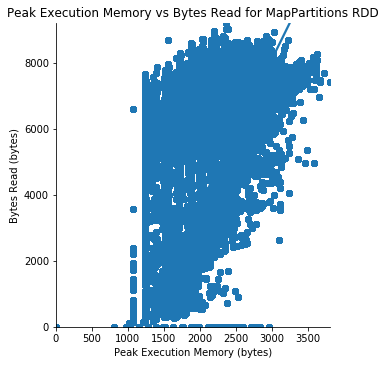

In [84]:
ax = sns.lmplot(x="peakExecutionMemory", y="bytesRead", truncate=True, data=df)
ax.set(xlabel='Peak Execution Memory (bytes)', 
       xlim = (0,max(df["peakExecutionMemory"])),
       ylabel='Bytes Read (bytes)', 
       ylim = (0,max(df["bytesRead"])),
       title="Peak Execution Memory vs Bytes Read for MapPartitions RDD")

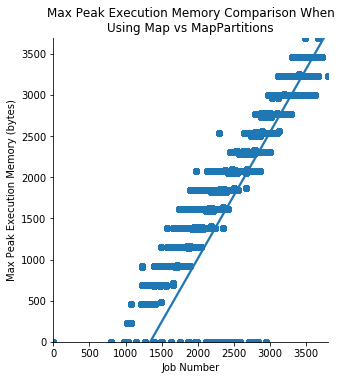

In [82]:
ax = sns.lmplot(x="peakExecutionMemory", y="shuffleBytesWritten", truncate=True, data=df)
ax.set(xlabel='Peak Execution Memory (bytes)', 
       xlim = (0,max(df["peakExecutionMemory"])),
       ylabel='Shuffle Bytes Written (bytes)', 
       ylim = (0,max(df["shuffleBytesWritten"])),
       title="Peak Execution Memory vs Bytes Read for MapPartitions RDD")